In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
from google.colab import drive

# 授權Colab訪問Google Drive
drive.mount('/content/drive')
ecg_directory = '/content/drive/MyDrive/ECG'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


MIT-BIH Dataset

(From https://www.kaggle.com/datasets/shayanfazeli/heartbeat)

In [26]:
# 確認檔案存在於目錄
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/ECG/SMOTE'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [27]:
# read CSV file
import pandas as pd
train_df=pd.read_csv('/content/drive/MyDrive/mitbih_train.csv',header=None)
test_df=pd.read_csv('/content/drive/MyDrive/mitbih_test.csv',header=None)

In [28]:
# Check 前兩行資料
print(train_df.head(2))

# [187]欄位個數統計
train_df[187].value_counts()

        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  

[2 rows x 188 columns]


0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

ECG_wave.shape= (87554, 186)
ECG_id= (87554,)
ID0= 0.0
ID1= 1.0
ID2= 2.0
ID3= 3.0
ID4= 4.0


<Axes: >

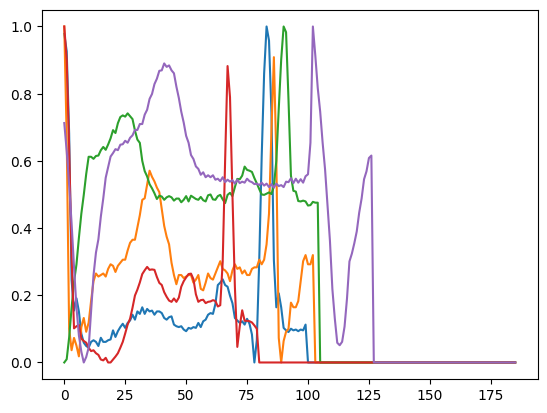

In [29]:
# ECG Wveform = 每一列 0 ~ 186 欄位
ECG_wave=train_df.iloc[:,0:186]
# ECG ID = 每一列的第187欄位
ECG_id=train_df.iloc[:,187]
# 列出 ECG_wave / ECG_id shape
print('ECG_wave.shape=',ECG_wave.shape)
print('ECG_id=',ECG_id.shape)

# Type 0 = Row0 ~ R72470
print('ID0=',ECG_id[0])
waveform_0=ECG_wave.loc[0]
waveform_0.plot()

# Type 1 = Row72471 ~ R74693
print('ID1=',ECG_id[72471])
waveform_1=ECG_wave.loc[72471]
waveform_1.plot()

# Type 2 = Row74694 ~ R80481
print('ID2=',ECG_id[74694])
waveform_2=ECG_wave.loc[74694]
waveform_2.plot()

# Type 3 = Row80482 ~ R81122
print('ID3=',ECG_id[80482])
waveform_3=ECG_wave.loc[80482]
waveform_3.plot()

# Type 4 = Row81123 ~ R87553
print('ID4=',ECG_id[81123])
waveform_4=ECG_wave.loc[81123]
waveform_4.plot()

In [30]:
# ECG Dataset 分成5類 df_0 - df_4 的方法

df_0=train_df[train_df[187]==0]
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]

# 確認每一類樣本數

print(df_0[187].value_counts())
print(df_1[187].value_counts())
print(df_2[187].value_counts())
print(df_3[187].value_counts())
print(df_4[187].value_counts())

0.0    72471
Name: 187, dtype: int64
1.0    2223
Name: 187, dtype: int64
2.0    5788
Name: 187, dtype: int64
3.0    641
Name: 187, dtype: int64
4.0    6431
Name: 187, dtype: int64


In [31]:
# [187]欄位整數化  4.0 -> 4
train_df[187]=train_df[187].astype(int)

In [32]:
# df.iloc[:, :-1] 直到最后一列
# df.iloc[:, -1] 最後一列

#X=df.iloc[:,:-1]
#y=df.iloc[:,-1]

SMOTE [Synthetic Minority Over-sampling Technique  used for oversampling]

[1] 隨機取 5% 當Training Set

In [33]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import train_test_split



In [34]:

# 隨機切割 5% 當 Train Set / 95% = ECG1 , 5% = ECG2
ECG_wave1, ECG_wave2, ECG_id1, ECG_id2 = train_test_split(ECG_wave, ECG_id, test_size=0.1, random_state=28)

print('ECG_wave1=',ECG_wave1.shape)
print('ECG_wave2=',ECG_wave2.shape)
print('ECG_id1=',ECG_id1.shape)
print('ECG_id2=',ECG_id2.shape)

#個數統計
ECG_id2.value_counts()

ECG_wave1= (78798, 186)
ECG_wave2= (8756, 186)
ECG_id1= (78798,)
ECG_id2= (8756,)


0.0    7309
4.0     616
2.0     538
1.0     240
3.0      53
Name: 187, dtype: int64


[2]SMOTE: Imbalanced Dataset Processing


In [35]:

import imblearn
from imblearn.over_sampling import SMOTE


smote=SMOTE()
wave_smote,id_smote=smote.fit_resample(ECG_wave2,ECG_id2)

ECG_id2=ECG_id2.astype(int)
print(id_smote.value_counts())
print(wave_smote.shape)


# train_new = SMOTE 後的 train_df
# pd.concat 合併回原來的dataset X_oversampled + y_sampled = train_df


train_new_df=pd.concat([wave_smote, id_smote],axis='columns')
print(train_new_df.shape)

0.0    7309
2.0    7309
4.0    7309
1.0    7309
3.0    7309
Name: 187, dtype: int64
(36545, 186)
(36545, 187)


CNN

train daraset: train_new_df  
test dataset:  test_df

In [36]:
# to_categorical 轉換成 二進位
from keras.utils.np_utils import to_categorical


#target_train=train_new_df[187]  #SMOTE
target_train=train_df[187]

target_test=test_df[187]
id_train=to_categorical(target_train)
id_test=to_categorical(target_test)

#wave_train=train_new_df.iloc[:,:186].values  # SMOTE
wave_train=train_df.iloc[:,:186].values

wave_test=test_df.iloc[:,:186].values

In [37]:
# def network(X_train,y_train,X_test,y_test):


#     im_shape=(X_train.shape[1],1)
#     inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
#     conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
#     conv1_1=BatchNormalization()(conv1_1)
#     pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
#     conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
#     conv2_1=BatchNormalization()(conv2_1)
#     pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
#     conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
#     conv3_1=BatchNormalization()(conv3_1)
#     pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
#     flatten=Flatten()(pool3)
#     dense_end1 = Dense(64, activation='relu')(flatten)
#     dense_end2 = Dense(32, activation='relu')(dense_end1)
#     main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)


#     model = Model(inputs= inputs_cnn, outputs=main_output)
#     model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])


#     callbacks = [EarlyStopping(monitor='val_loss', patience=8),
#              ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

#     history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=64,validation_data=(X_test,y_test))
#     model.load_weights('best_model.h5')
#     return(model,history)

In [38]:
def network(X_train,y_train,X_test,y_test):

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')

    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)

    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)

    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)

    conv4_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool3)
    conv4_1=BatchNormalization()(conv3_1)
    pool4=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv4_1)

    flatten=Flatten()(pool4)

    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    dense_end3 = Dense(32, activation='relu')(dense_end2)

    main_output = Dense(5, activation='softmax', name='main_output')(dense_end3)


    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])


    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
            ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
    #EarlyStopping用在驗證集上的損失不再改善時停止訓練，以避免過度擬合
    #patience=8 連續8個訓練輪中都沒有改善時，訓練將停止
    #用於保存在驗證集上表現最佳的模型權重
    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=64,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [39]:
import matplotlib.pyplot as plt

def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))

    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']

    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [40]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    BatchNormalization, Convolution1D, MaxPool1D, Activation, Flatten, Dropout, Dense , Input
)

from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(wave_train,id_train,wave_test,id_test)


Epoch 1/40
1369/1369 [==============================] - 23s 11ms/step - loss: 0.1347 - accuracy: 0.9623 - val_loss: 0.1227 - val_accuracy: 0.9675
Epoch 2/40
1369/1369 [==============================] - 15s 11ms/step - loss: 0.0762 - accuracy: 0.9779 - val_loss: 0.0841 - val_accuracy: 0.9773
Epoch 3/40
1369/1369 [==============================] - 13s 9ms/step - loss: 0.0593 - accuracy: 0.9824 - val_loss: 0.0797 - val_accuracy: 0.9796
Epoch 4/40
1369/1369 [==============================] - 13s 9ms/step - loss: 0.0490 - accuracy: 0.9853 - val_loss: 0.1085 - val_accuracy: 0.9688
Epoch 5/40
1369/1369 [==============================] - 14s 10ms/step - loss: 0.0420 - accuracy: 0.9872 - val_loss: 0.0677 - val_accuracy: 0.9818
Epoch 6/40
1369/1369 [==============================] - 13s 10ms/step - loss: 0.0367 - accuracy: 0.9885 - val_loss: 0.0951 - val_accuracy: 0.9756
Epoch 7/40
1369/1369 [==============================] - 13s 9ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0709 - va

Accuracy: 98.18%


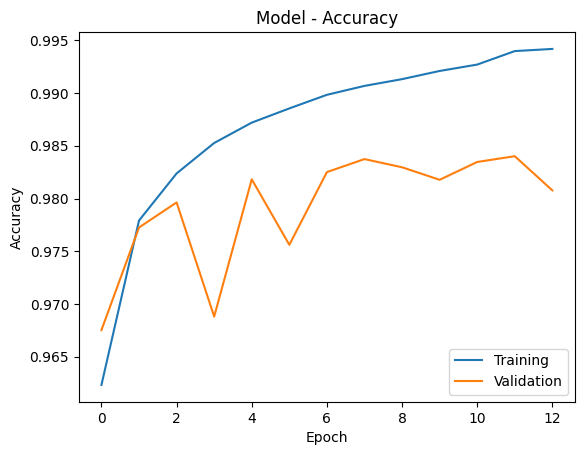

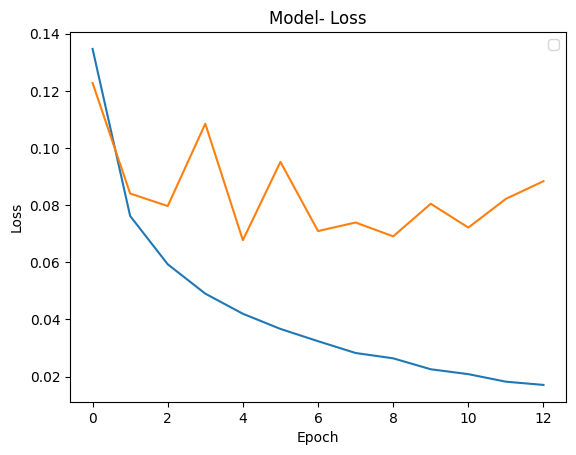

685/685 [==============================] - 2s 2ms/step
       y_true  prediction
0           0           0
1           0           0
2           0           0
3           0           0
4           0           0
...       ...         ...
21887       4           4
21888       4           4
21889       4           4
21890       4           4
21891       4           4

[21892 rows x 2 columns]


In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix

# 評估模型並輸出結果
evaluate_model(history, wave_test, id_test, model)

# 將結果轉換為DataFrame
y_true = []
for element in id_test:
    y_true.append(np.argmax(element))
prediction_proba = model.predict(wave_test)
prediction = np.argmax(prediction_proba, axis=1)
# cnf_matrix = confusion_matrix(y_true, prediction)

result_df = pd.DataFrame({
    'y_true': y_true,
    'prediction': prediction
})

# 查看資料
print(result_df)